# Company: Paramount Global

# Sentiment Analysis 

In [ ]:
pip install pandas
pip install transformers
pip install scipy
pip install matplotlib
pip install wordcloud
pip install nltk
pip install numpy
pip install scikit-learn
pip install tensorflow
pip install keras
pip install prophet
pip install seaborn

In [2]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from scipy.special import softmax


In [4]:

roberta = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']

news_df = pd.read_csv('NewsSentiment_PARA.csv', encoding='utf-8')

# Perform sentiment analysis
news_proc_list = []
sentiment_list = []

for headlines in news_df['Headlines']:
    news_words = []
    for word in headlines.split(' '):
        if word.startswith('http'):
            word = "http"
        news_words.append(word)

    news_proc = " ".join(news_words)
    news_proc_list.append(news_proc)

    encoder_news = tokenizer(news_proc, return_tensors='pt')
    output = model(**encoder_news)
    scores = output.logits.detach().numpy()[0]
    scores = softmax(scores)

    sentiment = {label: score for label, score in zip(labels, scores)}
    sentiment_list.append(sentiment)

# Append sentiment labels
sentiment_df = pd.DataFrame(sentiment_list)
news_df = pd.concat([news_df, sentiment_df], axis=1)

# Determine sentiment with the highest value
news_df['Actual Sentiment'] = news_df[labels].idxmax(axis=1)
news_df['Sentiment value'] = news_df[labels].max(axis=1)

# Save the updated DataFrame back to the same file
news_df.to_csv('NewsSentiment_PARA.csv', encoding='utf-8', index=False)


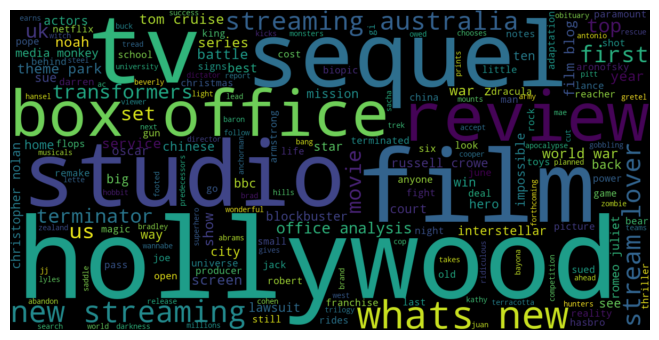

In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import pandas as pd
from datetime import datetime

data = pd.read_csv('NewsSentiments_PARA.csv', encoding='latin-1')
text = ' '.join(data['Headlines'].astype(str).tolist())

# Remove non-ASCII characters
text = ''.join(character for character in text if ord(character) < 128)

# Adding more stop words
additional_stop_words = ['Paramount','Global']

#Converting additional words to lower case
additional_stop_words_lower = [word.lower() for word in additional_stop_words]

additional_stop_words_lower

# Remove stopwords
stop_words = set(stopwords.words('english') + additional_stop_words + additional_stop_words_lower)
tokens = text.lower().split()
filtered_tokens = [token for token in tokens if token not in stop_words]
filtered_text = ' '.join(filtered_tokens)

# Generate word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='Black').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 3.5), tight_layout=True)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

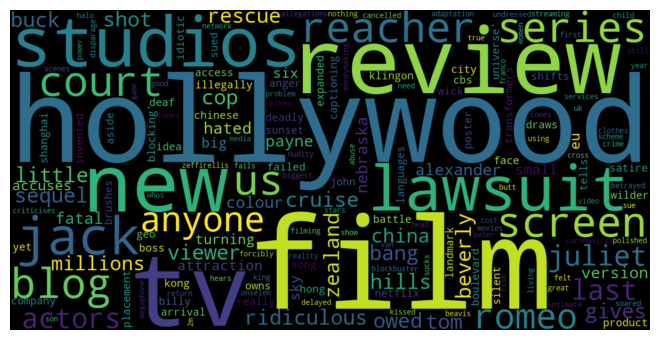

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import pandas as pd

data = pd.read_csv('NewsSentiments_PARA.csv', encoding='latin-1')

negative_headlines = data[data['Actual Sentiment'] == 'Negative']['Headlines'].astype(str).tolist()

# Combine all the negative headlines into a single string
text = ' '.join(negative_headlines)

# Remove non-ASCII characters
text = ''.join(character for character in text if ord(character) < 128)

# Adding more stop words
additional_stop_words = ['Paramount','Global']

# Converting additional words to lower case
additional_stop_words_lower = [word.lower() for word in additional_stop_words]

# Remove stopwords
stop_words = set(stopwords.words('english') + additional_stop_words + additional_stop_words_lower)
tokens = text.lower().split()
filtered_tokens = [token for token in tokens if token not in stop_words]
filtered_text = ' '.join(filtered_tokens)

# Generate word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='Black').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 3.5), tight_layout=True)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


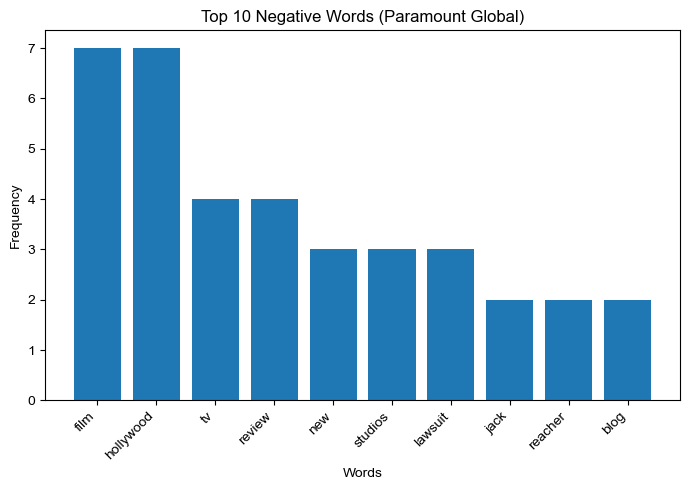

In [4]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import pandas as pd
from collections import Counter
import re

data = pd.read_csv('NewsSentiments_PARA.csv', encoding='latin-1')

# Filter out negative headlines
negative_headlines = data[data['Actual Sentiment'] == 'Negative']['Headlines'].astype(str).tolist()

# Combine all the negative headlines into a single string
text = ' '.join(negative_headlines)

# Remove non-ASCII characters
text = ''.join(character for character in text if ord(character) < 128)

# Adding more stop words
additional_stop_words = ['Paramount']

# Converting additional words to lower case
additional_stop_words_lower = [word.lower() for word in additional_stop_words]

# Remove stopwords
stop_words = set(stopwords.words('english') + additional_stop_words + additional_stop_words_lower)

# Split text into words and clean them
tokens = re.findall(r'\b\w+\b', text.lower())
filtered_tokens = [token for token in tokens if token not in stop_words]

# Get top 20 words with negative sentiments
word_counts = Counter(filtered_tokens)
top_10_negative_words = word_counts.most_common(10)

# Extract words and counts for the histogram
words, counts = zip(*top_10_negative_words)

# Create a histogram with Arial font
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'

plt.figure(figsize=(7, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Negative Words (Paramount Global)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


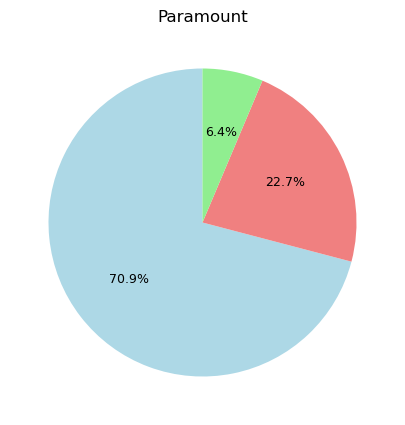

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('NewsSentiments_PARA.csv', encoding='latin-1')

# Get unique sentiment labels
sentiment_labels = data['Actual Sentiment'].unique()

# Define custom colors for sentiment labels
colors = {'Negative': 'lightcoral', 'Positive': 'lightgreen', 'Neutral': 'lightblue'}

# Calculate the percentage of each sentiment label
percentage_values = [(data['Actual Sentiment'] == label).mean() * 100 for label in sentiment_labels]

# Plot Sentiment Pie Chart with custom colors
plt.figure(figsize=(7, 5))
_, texts, _ = plt.pie(percentage_values, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 9},colors=[colors[label] for label in sentiment_labels])
plt.title('Paramount')


plt.show()


# LSTM applied on PARA Base Data

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


df = pd.read_csv('PARA.csv')

# Using MinMaxScaler to scale the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop('Date', axis=1))

# Create sequences of 60 days and predict the next day
X = []
y = []

for i in range(60, len(scaled_data) - 30): #-30 is used since we are predicting price for last 30 days
    X.append(scaled_data[i-60:i])
    y.append(np.where(scaled_data[i][-2] > scaled_data[i-1][-2], 1, 0))  

X, y = np.array(X), np.array(y)

# Define the LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=25, batch_size=25)

# Prepare the test data
X_test = []
y_test = []

for i in range(len(scaled_data) - 30, len(scaled_data)):
    X_test.append(scaled_data[i-60:i])
    y_test.append(np.where(scaled_data[i][-2] > scaled_data[i-1][-2], 1, 0))

X_test, y_test = np.array(X_test), np.array(y_test)

# Predicting
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).ravel()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


print(y_test)
print(y_pred)

Epoch 1/25
103/103 [==============================] - 11s 57ms/step - loss: 0.6948 - accuracy: 0.4927
Epoch 2/25
103/103 [==============================] - 6s 58ms/step - loss: 0.6940 - accuracy: 0.5065
Epoch 3/25
103/103 [==============================] - 6s 56ms/step - loss: 0.6933 - accuracy: 0.5104
Epoch 4/25
103/103 [==============================] - 6s 63ms/step - loss: 0.6934 - accuracy: 0.5214
Epoch 5/25
103/103 [==============================] - 6s 55ms/step - loss: 0.6937 - accuracy: 0.5088
Epoch 6/25
103/103 [==============================] - 6s 55ms/step - loss: 0.6933 - accuracy: 0.5022
Epoch 7/25
103/103 [==============================] - 6s 63ms/step - loss: 0.6933 - accuracy: 0.5041
Epoch 8/25
103/103 [==============================] - 6s 56ms/step - loss: 0.6932 - accuracy: 0.5014
Epoch 9/25
103/103 [==============================] - 7s 70ms/step - loss: 0.6935 - accuracy: 0.5088
Epoch 10/25
103/103 [==============================] - 7s 66ms/step - loss: 0.6929 - accur

# LSTM applied on PARA Technical Indicators

Epoch 1/20
80/80 [==============================] - 11s 64ms/step - loss: 0.6712 - accuracy: 0.6002
Epoch 2/20
80/80 [==============================] - 4s 52ms/step - loss: 0.6470 - accuracy: 0.6256
Epoch 3/20
80/80 [==============================] - 5s 57ms/step - loss: 0.6159 - accuracy: 0.6570
Epoch 4/20
80/80 [==============================] - 4s 54ms/step - loss: 0.4821 - accuracy: 0.7758
Epoch 5/20
80/80 [==============================] - 4s 56ms/step - loss: 0.3471 - accuracy: 0.8518
Epoch 6/20
80/80 [==============================] - 4s 53ms/step - loss: 0.2807 - accuracy: 0.8761
Epoch 7/20
80/80 [==============================] - 4s 54ms/step - loss: 0.2617 - accuracy: 0.8883
Epoch 8/20
80/80 [==============================] - 5s 62ms/step - loss: 0.2507 - accuracy: 0.8910
Epoch 9/20
80/80 [==============================] - 4s 55ms/step - loss: 0.2517 - accuracy: 0.8902
Epoch 10/20
80/80 [==============================] - 5s 59ms/step - loss: 0.2458 - accuracy: 0.8953
Epoch 11

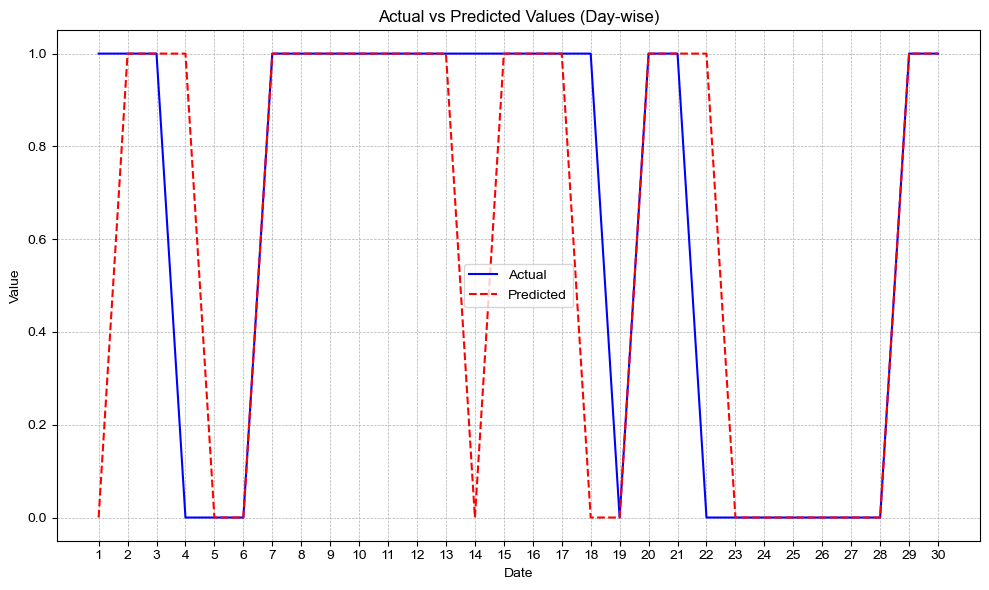

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


df = pd.read_csv('PARA_TechIndicators.csv')


# Using MinMaxScaler to scale the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop('Date', axis=1))

# Create sequences of 60 days and predict the next day
X = []
y = []

for i in range(60, len(scaled_data) - 30):  # stopping at -30 to leave last 30 days for testing
    X.append(scaled_data[i-60:i])
    y.append(np.where(scaled_data[i][-2] > scaled_data[i-1][-2], 1, 0))  
    
X, y = np.array(X), np.array(y)


# Define the LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=20, batch_size=32)

# Prepare the test data for the last 30 days
X_test = []

for i in range(len(scaled_data) - 30, len(scaled_data)):
    X_test.append(scaled_data[i-60:i])
 

X_test = np.array(X_test)

# Predicting
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int).ravel()


# Generate y_test
y_test = []
for i in range(len(scaled_data) - 30, len(scaled_data)):
    y_test.append(np.where(scaled_data[i][-2] > scaled_data[i-1][-2], 1, 0))

y_test = np.array(y_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

days = range(1, len(y_test) + 1)

plt.figure(figsize=(10,6))
plt.title('Actual vs Predicted Values (Day-wise)')
plt.plot(days, y_test, color='blue', label='Actual')
plt.plot(days, y_pred_binary, color='red', linestyle='dashed', label='Predicted')

plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(days)  
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# LSTM applied on PARA News sentiment 

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

df = pd.read_csv('Combined_PARA_filled.csv')

df = pd.concat([df, pd.get_dummies(df['Actual Sentiment'], prefix='Sentiment')], axis=1)

df = df.drop(['Date'], axis=1)

# Creating a 'Trend' column for predicting stock market trends
df['Trend'] = df['Close'].pct_change().apply(lambda x: 1 if x > 0 else 0)

sentiment_mapping = {
    'Negative': -1,
    'Neutral': 0,
    'Positive': 1,
}

# Separate the datasets
split_point = len(df) - 30
train_df = df.iloc[:split_point]
test_df = df.iloc[split_point:]

train_df = train_df.dropna(subset=['Actual Sentiment', 'Sentiment value'])

# Use forward fill for the test dataset
test_df = test_df.ffill().dropna()

train_df['Actual Sentiment'] = train_df['Actual Sentiment'].map(sentiment_mapping)
test_df['Actual Sentiment'] = test_df['Actual Sentiment'].map(sentiment_mapping)

# Define features (excluding the target variable 'Trend') and target variable
X_train = train_df.drop('Trend', axis=1)
y_train = train_df['Trend']

X_test = test_df.drop('Trend', axis=1)
y_test = test_df['Trend']


# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=30, validation_data=(X_test, y_test), verbose=1, shuffle=False)


# Make predictions on the test set
predicted_trends = model.predict(X_test)
predicted_trends = [1 if x[0] > 0.5 else 0 for x in predicted_trends]  # Threshold the predictions

# Visualization: Actual vs Predicted Trends for the Last 30 days
plt.figure(figsize=(15, 6))

plt.plot(y_test.reset_index(drop=True), color='blue', label='Actual Trends', marker='o')
plt.plot(predicted_trends, color='red', label='Predicted Trends', marker='x')
plt.title('Actual vs Predicted Stock Trends for the Last 30 days')
plt.xlabel('Days')
plt.ylabel('Trend (Upward=1, Not-upward=0)')
plt.legend()
plt.grid(True)
plt.show()


# Calculate Accuracy, Precision, Recall, and F1 score
accuracy = accuracy_score(y_test, predicted_trends)
precision = precision_score(y_test, predicted_trends)
recall = recall_score(y_test, predicted_trends)
f1 = f1_score(y_test, predicted_trends)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Logistic Regression applied on PARA Base data

Accuracy: 0.5000
Precision: 0.4762
Recall: 0.7143
F1 Score: 0.5714


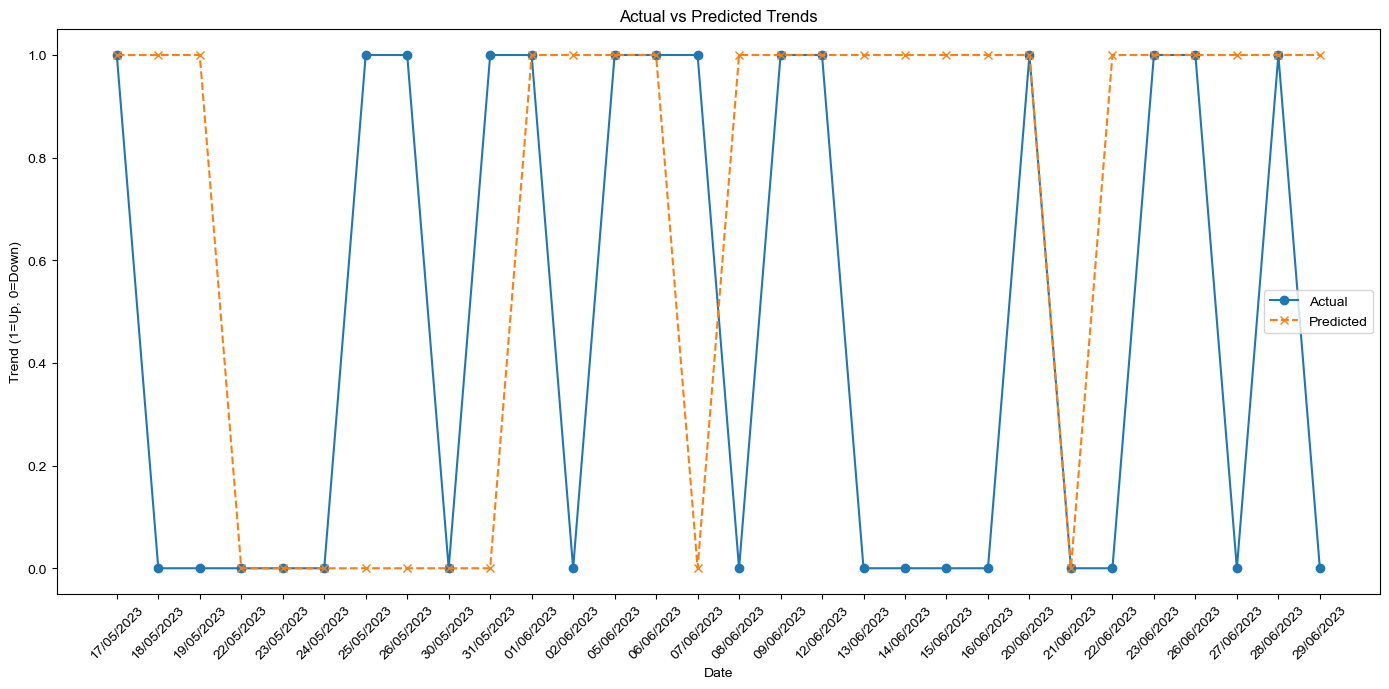

In [19]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('PARA.csv')

# Calculate the trend
df['Trend'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Create features
df['Return'] = df['Close'].pct_change()
df['Rolling_Mean'] = df['Close'].rolling(window=5).mean()
df['Rolling_Std'] = df['Close'].rolling(window=5).std()

# Drop missing values
df.dropna(inplace=True)

# Features and target
X = df[['Return', 'Rolling_Mean', 'Rolling_Std', 'Volume']]
y = df['Trend']

# Train-test split
train_size = len(df) - 30
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Create results_df
results_df = pd.DataFrame({
    'Date': df['Date'][train_size:].values,
    'Trend': y_test.values,
    'Predicted_Trend': y_pred
})

# Visual comparison
plt.figure(figsize=(14, 7))
plt.plot(results_df['Date'], results_df['Trend'], marker='o', label='Actual')
plt.plot(results_df['Date'], results_df['Predicted_Trend'], marker='x', linestyle='--', label='Predicted')
plt.title("Actual vs Predicted Trends")
plt.xlabel("Date")
plt.ylabel("Trend (1=Up, 0=Down)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Logistic Regression applied on PARA Technical Indicators

Accuracy: 0.5666666666666667
Precision: 0.5625
Recall: 0.6
F1 score: 0.5806451612903225


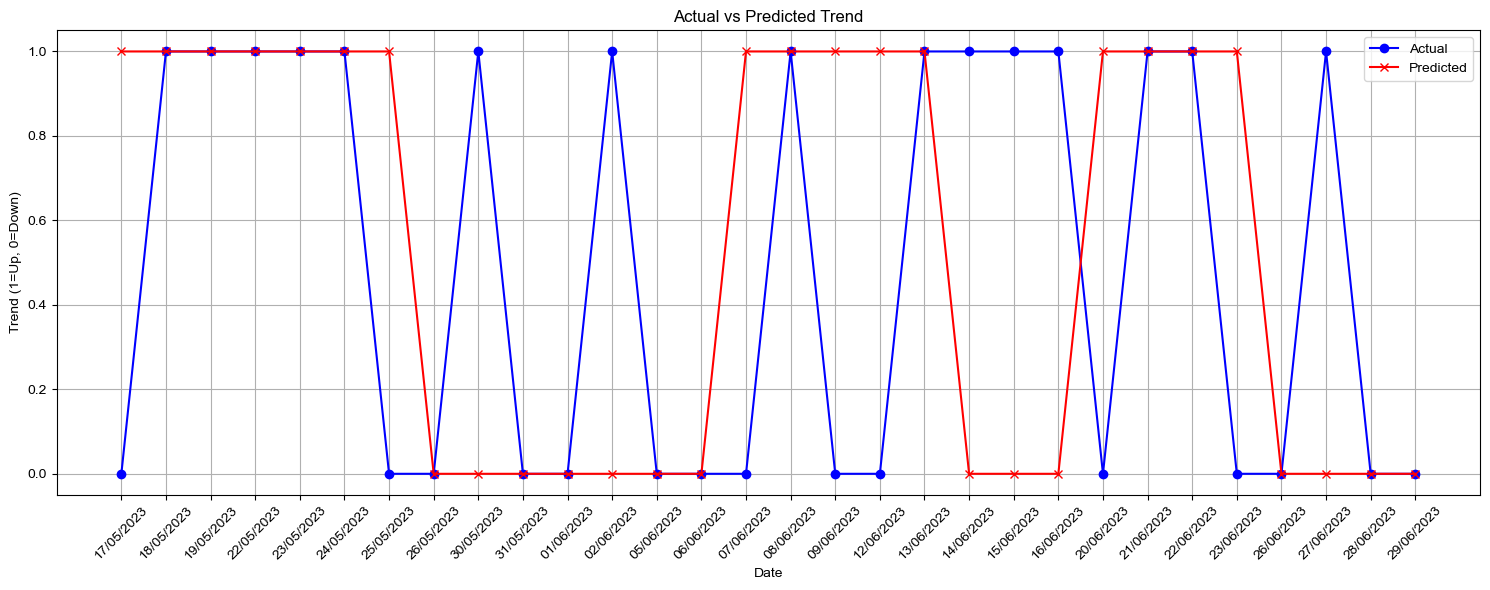

In [41]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('PARA_TechIndicators.csv')

df['Trend'] = df['Close'].shift(-1) < df['Close']
df['Trend'] = df['Trend'].astype(int)
df.dropna(inplace=True)

features = ['Open','Close','High','Low', 'SMA', 'EMA', 'MACD', 'RSI','ATR', 'OBV', 'Percent_R', 'CCI', 'ROC', '%D', '%K']

# Separate the last 30 days for testing
train_df = df.iloc[:-30]
test_df = df.iloc[-30:]

X_train = train_df[features]
y_train = train_df['Trend']

X_test = test_df[features]
y_test = test_df['Trend']

# Model training
model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', max_iter=10000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

# Plotting the graph
plt.figure(figsize=(15, 6))
dates = test_df['Date']

plt.plot(dates, y_test, color='blue', label='Actual', marker='o')
plt.plot(dates, y_pred, color='red', label='Predicted', marker='x')

plt.title('Actual vs Predicted Trend')
plt.xlabel('Date')
plt.ylabel('Trend (1=Up, 0=Down)')
plt.xticks(dates, rotation=45)  

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Logistic Regression applied on PARA News Sentiments

C:\Users\sheet\AppData\Local\Temp\ipykernel_21760\3191424662.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Actual Sentiment'].fillna(method='ffill', inplace=True)
C:\Users\sheet\AppData\Local\Temp\ipykernel_21760\3191424662.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Sentiment value'].fillna(method='ffill', inplace=True)


Accuracy:  0.4766666666666667
Precision: 0.6153846153846154
Recall: 0.5333333333333333
F1 score: 0.5714285714285715


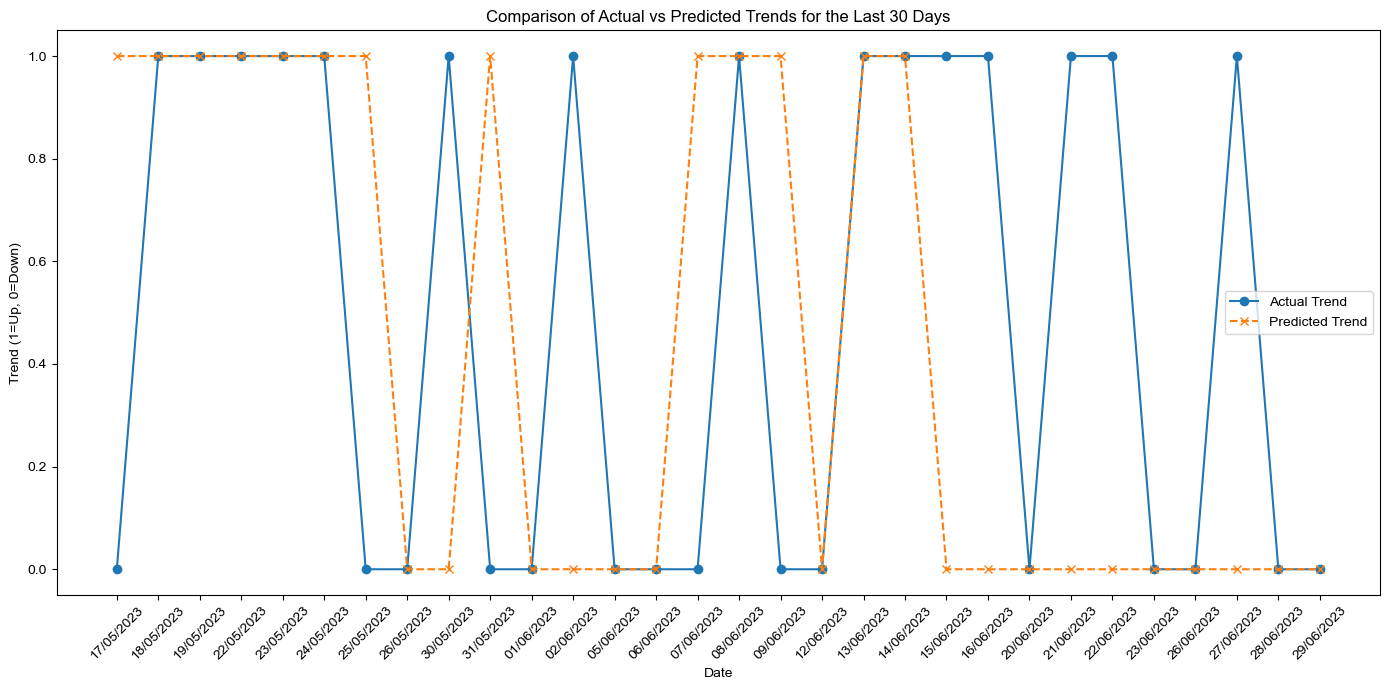

In [56]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

df = pd.read_csv('Combined_PARA_filled.csv')

train_df = df.iloc[:-30]
test_df = df.iloc[-30:]

# Remove rows with blank values in 'Actual Sentiment' and 'Sentiment value' for training set
train_df = train_df.dropna(subset=['Actual Sentiment', 'Sentiment value'])

# For the test set, replace the blank values using ffill
test_df['Actual Sentiment'].fillna(method='ffill', inplace=True)
test_df['Sentiment value'].fillna(method='ffill', inplace=True)


# Combine train and test dataframes back
df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

le = LabelEncoder()
df['Actual Sentiment'] = le.fit_transform(df['Actual Sentiment'])

# Generating Trend
df['Trend'] = (df['Close'].shift(-1) < df['Close']).astype(int)

# Features and target
features = ['Close', 'Adj Close', 'SMA', 'EMA', 'MACD','ADX', 'CCI', 'ROC',  '%K', 'Actual Sentiment', 'Sentiment value']
   

X = df[features].iloc[:-30]
y = df['Trend'].iloc[:-30]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model and Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=10000, class_weight='balanced')
accuracies = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')

df.iloc[-30:] = df.iloc[-30:].fillna(method='ffill')

# Training and making predictions on the last 30 days
df.iloc[-30:] = df.iloc[-30:].fillna(method='bfill')

model.fit(X_scaled, y)
X_last_30 = df[features].iloc[-30:]
X_last_30_scaled = scaler.transform(X_last_30)
predictions_last_30 = model.predict(X_last_30_scaled)

# Extract actual trends for the last 30 days
actual_trends_last_30 = df['Trend'].tail(30)

# Metrics
print("Accuracy: ", accuracies.mean())
print("Precision:", precision_score(actual_trends_last_30, predictions_last_30))
print("Recall:", recall_score(actual_trends_last_30, predictions_last_30))
print("F1 score:", f1_score(actual_trends_last_30, predictions_last_30))
#print(classification_report(actual_trends_last_30, predictions_last_30))

# Visualization
comparison_df = df.tail(30).copy()
comparison_df['Predicted_Trend'] = predictions_last_30

plt.figure(figsize=(14, 7))
plt.plot(comparison_df['Date'], comparison_df['Trend'], marker='o', label='Actual Trend')
plt.plot(comparison_df['Date'], comparison_df['Predicted_Trend'], marker='x', linestyle='--', label='Predicted Trend')
plt.title('Comparison of Actual vs Predicted Trends for the Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Trend (1=Up, 0=Down)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Prophet applied on PARA Base data

18:13:15 - cmdstanpy - INFO - Chain [1] start processing
18:13:15 - cmdstanpy - INFO - Chain [1] done processing


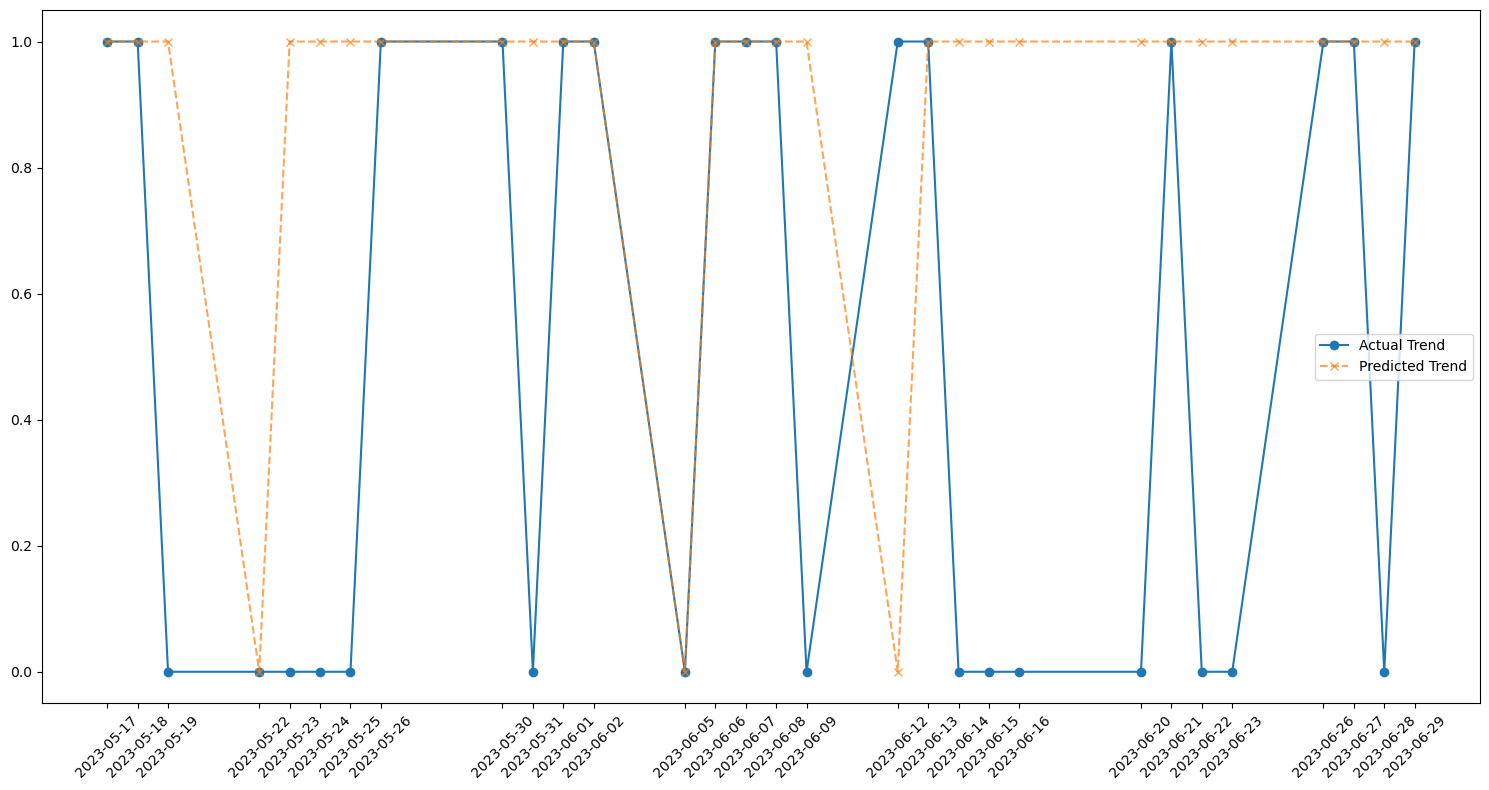

Accuracy: 0.5333
Precision: 0.5185
Recall: 0.9333
F1 Score: 0.6667


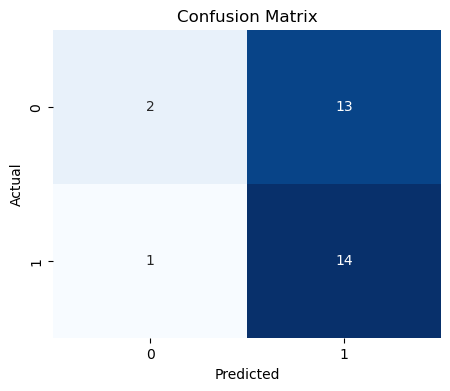

In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from prophet.plot import plot_cross_validation_metric
import seaborn as sns
from sklearn.metrics import confusion_matrix


df = pd.read_csv('PARA.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Calculate trend: 1 for increasing and 0 for decreasing or no change
df['trend'] = (df['Close'].diff() > 0).astype(int)

# Splitting data
train = df.iloc[:-30].copy()
test = df.iloc[-30:].copy()

train.rename(columns={'Date': 'ds', 'trend': 'y'}, inplace=True)

model = Prophet(
    daily_seasonality=True, 
    yearly_seasonality=True, 
    weekly_seasonality=True, 
    changepoint_prior_scale=0.01, 
    seasonality_prior_scale=0.1   
)

model.fit(train)

# Make predictions for the last 30 days
future = test[['Date']].rename(columns={'Date': 'ds'})
forecast = model.predict(future)
forecast['trend_pred'] = (forecast['yhat'].round() > 0).astype(int)
plt.figure(figsize=(15, 8))

plt.plot(test['Date'], test['trend'], 'o-', label='Actual Trend')

plt.plot(test['Date'], forecast['trend_pred'], 'x--', label='Predicted Trend', alpha=0.7)

plt.xticks(test['Date'], rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


# Calculate metrics
accuracy = accuracy_score(test['trend'], forecast['trend_pred'])
precision = precision_score(test['trend'], forecast['trend_pred'])
recall = recall_score(test['trend'], forecast['trend_pred'])
f1 = f1_score(test['trend'], forecast['trend_pred'])

# Print out the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

confusion = confusion_matrix(test['trend'], forecast['trend_pred'])

plt.figure(figsize=(5, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Prophet applied on PARA technical Indicators

18:25:30 - cmdstanpy - INFO - Chain [1] start processing
18:25:30 - cmdstanpy - INFO - Chain [1] done processing


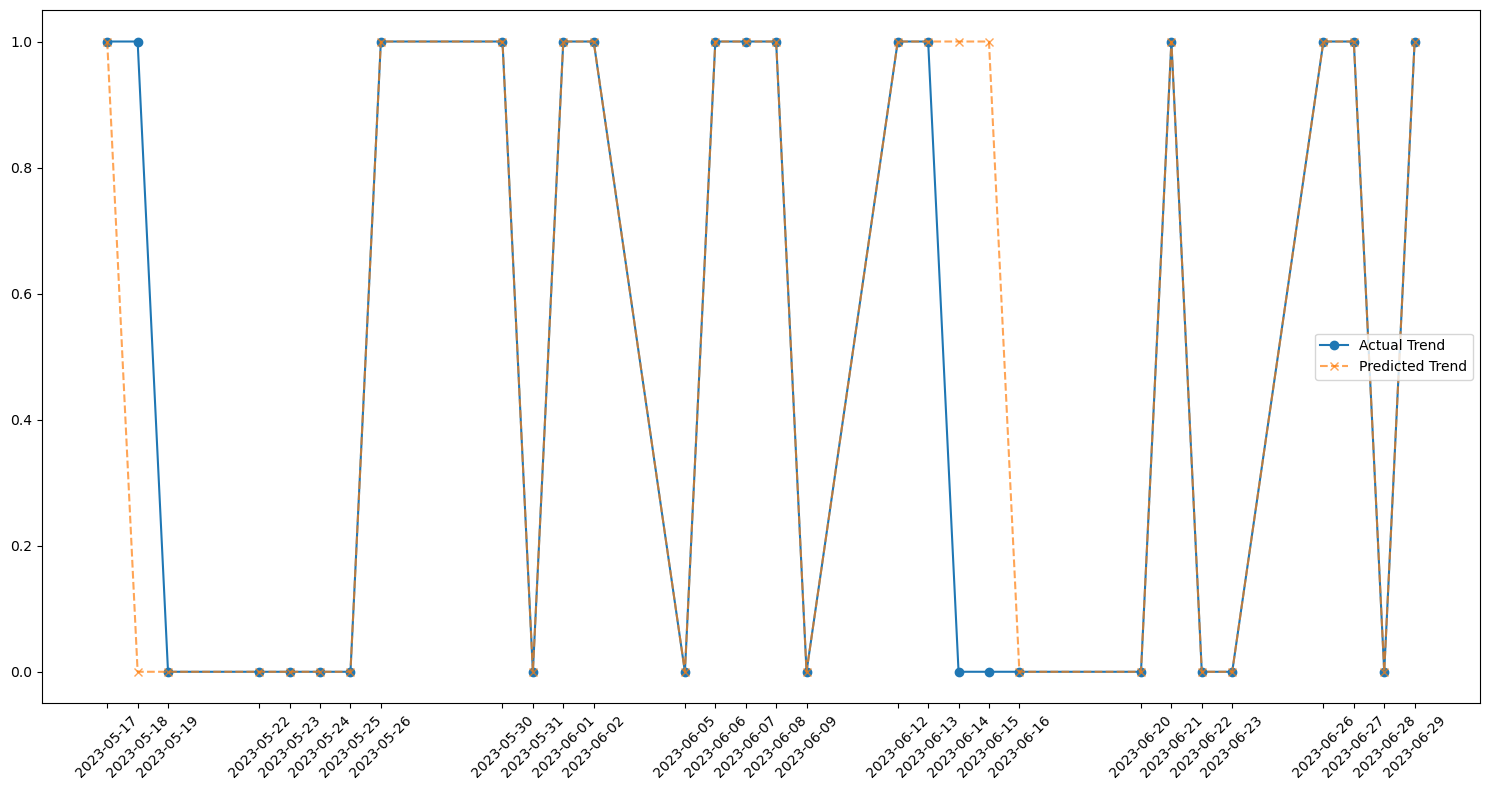

Accuracy: 0.9000
Precision: 0.8750
Recall: 0.9333
F1 Score: 0.9032


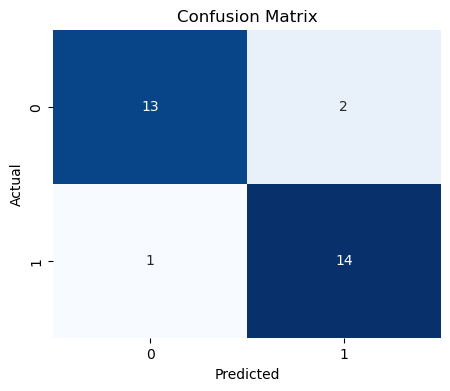

In [7]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('PARA_TechIndicators.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Calculate trend: 1 for increasing and 0 for decreasing or no change
df['trend'] = (df['Close'].diff() > 0).astype(int)

# Splitting data
train = df.iloc[:-30].copy()
test = df.iloc[-30:].copy()

# Rename columns for Prophet
train.rename(columns={'Date': 'ds', 'trend': 'y'}, inplace=True)


# Initialize Prophet model
model = Prophet(
    daily_seasonality=True, 
    yearly_seasonality=True, 
    weekly_seasonality=True, 
    changepoint_prior_scale=0.5, 
    seasonality_prior_scale=0.1,
    interval_width=0.85
       
)


model.add_regressor('Close')
model.add_regressor('SMA')
model.add_regressor('EMA')
model.add_regressor('MACD')
model.add_regressor('Percent_R')
model.add_regressor('ADX')
model.add_regressor('ROC')


model.fit(train)

# Make predictions for the last 30 days
future = test[['Date','Close','SMA','EMA','MACD','Percent_R','ADX','ROC']].rename(columns={'Date': 'ds'})
forecast = model.predict(future)
forecast['trend_pred'] = (forecast['yhat'].round() > 0).astype(int)

# Plot actual vs predicted trend
plt.figure(figsize=(15, 8))
plt.plot(test['Date'], test['trend'], 'o-', label='Actual Trend')
plt.plot(test['Date'], forecast['trend_pred'], 'x--', label='Predicted Trend', alpha=0.7)
plt.xticks(test['Date'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate metrics
accuracy = accuracy_score(test['trend'], forecast['trend_pred'])
precision = precision_score(test['trend'], forecast['trend_pred'])
recall = recall_score(test['trend'], forecast['trend_pred'])
f1 = f1_score(test['trend'], forecast['trend_pred'])

# Print out the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

confusion = confusion_matrix(test['trend'], forecast['trend_pred'])

plt.figure(figsize=(5, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Prophet applied on PARA News sentiments

18:25:21 - cmdstanpy - INFO - Chain [1] start processing
18:25:21 - cmdstanpy - INFO - Chain [1] done processing


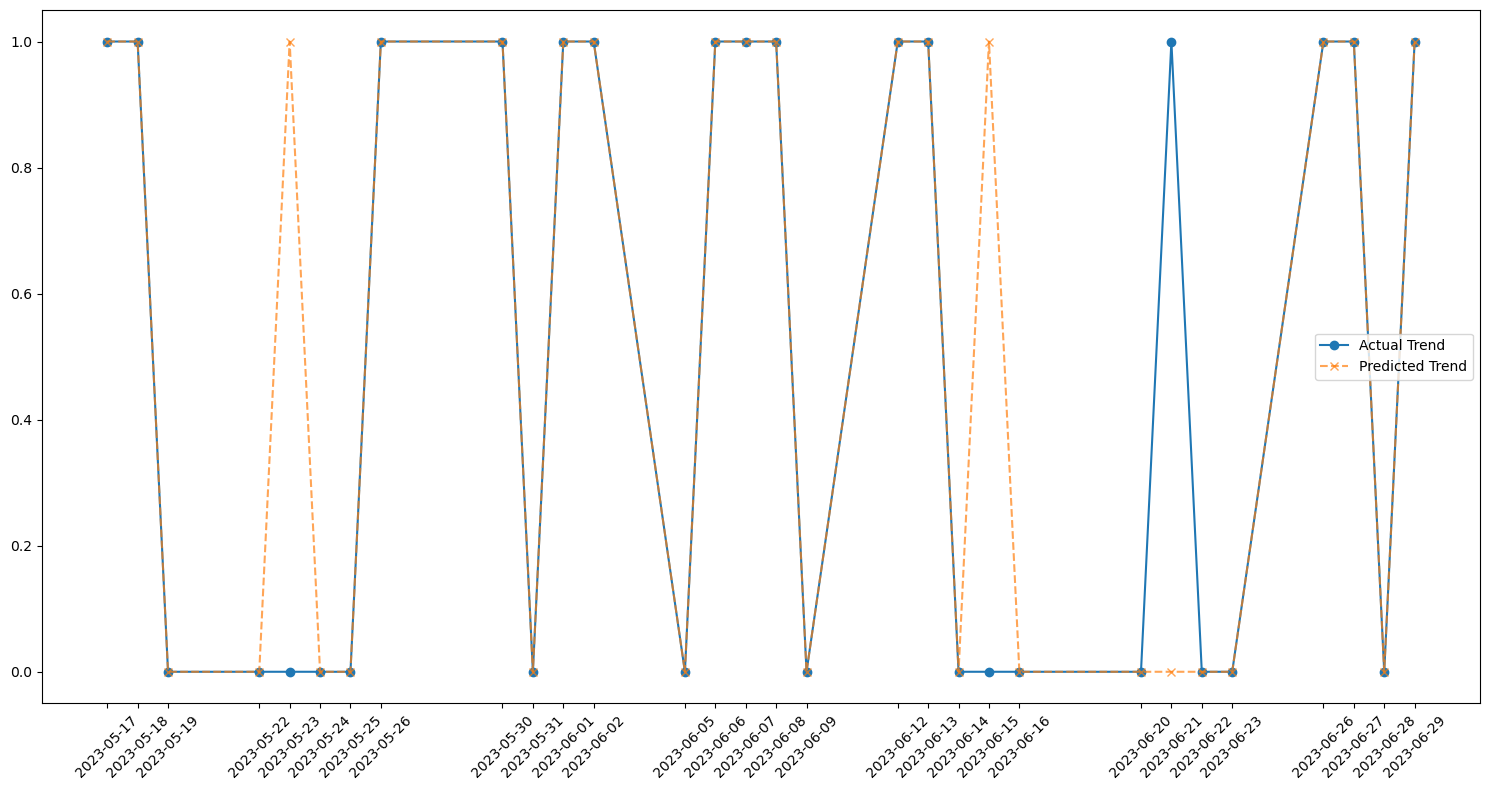

Accuracy: 0.9000
Precision: 0.8750
Recall: 0.9333
F1 Score: 0.9032


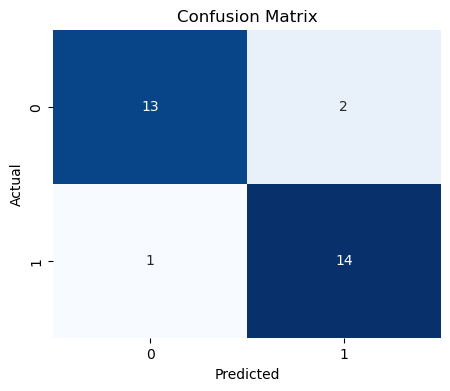

In [6]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('Combined_PARA_filled.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Calculate trend: 1 for increasing and 0 for decreasing or no change
df['trend'] = (df['Close'].diff() > 0).astype(int)

# Splitting data
train = df.iloc[:-30].copy()
test = df.iloc[-30:].copy()


train = train.dropna(subset=['Actual Sentiment', 'Sentiment value'])

train.rename(columns={'Date': 'ds', 'trend': 'y'}, inplace=True)


# Initialize Prophet model
model = Prophet(
    daily_seasonality=True, 
    yearly_seasonality=True, 
    weekly_seasonality=True, 
    changepoint_prior_scale=0.1, 
    seasonality_prior_scale=0.5,
    interval_width=0.85
       
)

sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
train['Actual Sentiment'] = train['Actual Sentiment'].map(sentiment_mapping)
test['Actual Sentiment'] = test['Actual Sentiment'].map(sentiment_mapping)


model.add_regressor('Actual Sentiment')
model.add_regressor('Sentiment value')
model.add_regressor('Close')
model.add_regressor('SMA')
model.add_regressor('EMA')
model.add_regressor('MACD')
model.add_regressor('Percent_R')
model.add_regressor('OBV')
model.add_regressor('CCI')
model.add_regressor('RSI')
model.add_regressor('ROC') 
model.add_regressor('%D')
model.add_regressor('%K')


model.fit(train)

# Interpolate NaN values for the 'Actual Sentiment' and 'Sentiment value' columns in the test set
test['Actual Sentiment'] = test['Actual Sentiment'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
test['Sentiment value'] = test['Sentiment value'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


# Make predictions for the last 30 days
future = test[['Date', 'Actual Sentiment', 'Sentiment value','%D','%K','RSI','ROC','Close','SMA','EMA','MACD','Percent_R','OBV','CCI']].rename(columns={'Date': 'ds'})
forecast = model.predict(future)
forecast['trend_pred'] = (forecast['yhat'].round() > 0).astype(int)

# Plot actual vs predicted trend
plt.figure(figsize=(15, 8))
plt.plot(test['Date'], test['trend'], 'o-', label='Actual Trend')
plt.plot(test['Date'], forecast['trend_pred'], 'x--', label='Predicted Trend', alpha=0.7)
plt.xticks(test['Date'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate metrics
accuracy = accuracy_score(test['trend'], forecast['trend_pred'])
precision = precision_score(test['trend'], forecast['trend_pred'])
recall = recall_score(test['trend'], forecast['trend_pred'])
f1 = f1_score(test['trend'], forecast['trend_pred'])

# Print out the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

confusion = confusion_matrix(test['trend'], forecast['trend_pred'])

plt.figure(figsize=(5, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

